In [7]:
# To train call 'neat_train.py' with arguments.
!python neat_train.py -h

usage: neat_train.py [-h] [-d DEFAULT] [-p HYPERPARAM] [-o OUTPREFIX]
                     [-n NUM_WORKER]

Evolve NEAT networks

optional arguments:
  -h, --help            show this help message and exit
  -d DEFAULT, --default DEFAULT
                        default hyperparameter file
  -p HYPERPARAM, --hyperparam HYPERPARAM
                        hyperparameter file
  -o OUTPREFIX, --outPrefix OUTPREFIX
                        file name for result output
  -n NUM_WORKER, --num_worker NUM_WORKER
                        number of cores to use


In [8]:
# Train using default NEAT parameters on cart-pole swing-up with a small population and few generations
# !cat p/quickTest.json
!python neat_train.py

['mpirun', '-np', '9', '/Users/eden/opt/anaconda3/envs/WANN/bin/python', 'neat_train.py']
0 	 - 	 |---| Elite Fit: -5.64 	|---| Best Fit:  -5.64
1 	 - 	 |---| Elite Fit: -4.72 	|---| Best Fit:  -4.72
2 	 - 	 |---| Elite Fit: -4.72 	|---| Best Fit:  -4.72
3 	 - 	 |---| Elite Fit: -4.26 	|---| Best Fit:  -4.26
4 	 - 	 |---| Elite Fit: -4.15 	|---| Best Fit:  -4.15
5 	 - 	 |---| Elite Fit: -4.15 	|---| Best Fit:  -4.15
6 	 - 	 |---| Elite Fit: -3.87 	|---| Best Fit:  -3.87
7 	 - 	 |---| Elite Fit: -3.84 	|---| Best Fit:  -3.84
8 	 - 	 |---| Elite Fit: -3.84 	|---| Best Fit:  -3.84
9 	 - 	 |---| Elite Fit: -3.84 	|---| Best Fit:  -3.84
10 	 - 	 |---| Elite Fit: -3.73 	|---| Best Fit:  -3.73
11 	 - 	 |---| Elite Fit: -3.72 	|---| Best Fit:  -3.72
12 	 - 	 |---| Elite Fit: -3.72 	|---| Best Fit:  -3.72
13 	 - 	 |---| Elite Fit: -3.38 	|---| Best Fit:  -3.38
14 	 - 	 |---| Elite Fit: -3.38 	|---| Best Fit:  -3.38
15 	 - 	 |---| Elite Fit: -3.14 	|---| Best Fit:  -3.14
16 	 - 	 |---| Elite Fit

Text(0, 0.5, 'Fitness')

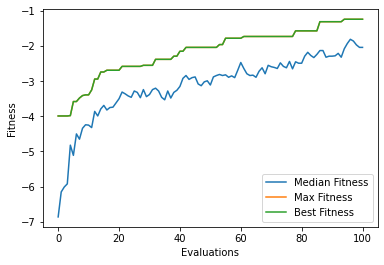

In [1]:
# -- View stats of a completed run
# Rows:
# 0 - Fitness evaluations used
# 1 - Median fitness of population
# 2 - Max fitness of population
# 3 - Top fitness every achieved
# 4 - Median number of nodes of individuals in population
# 5 - Median number of connections of individuals in population
from matplotlib import pyplot as plt
import numpy as np
stats = np.loadtxt('log/sept22__stats.out', delimiter=',')
fig, ax = plt.subplots()
x = stats[:,0]
y = stats[:,[1,2,3]]
plt.plot(y)
plt.legend(['Median Fitness','Max Fitness','Best Fitness'])
plt.xlabel('Evaluations')
plt.ylabel('Fitness')

# of Connections in ANN:  650


KeyError: 74

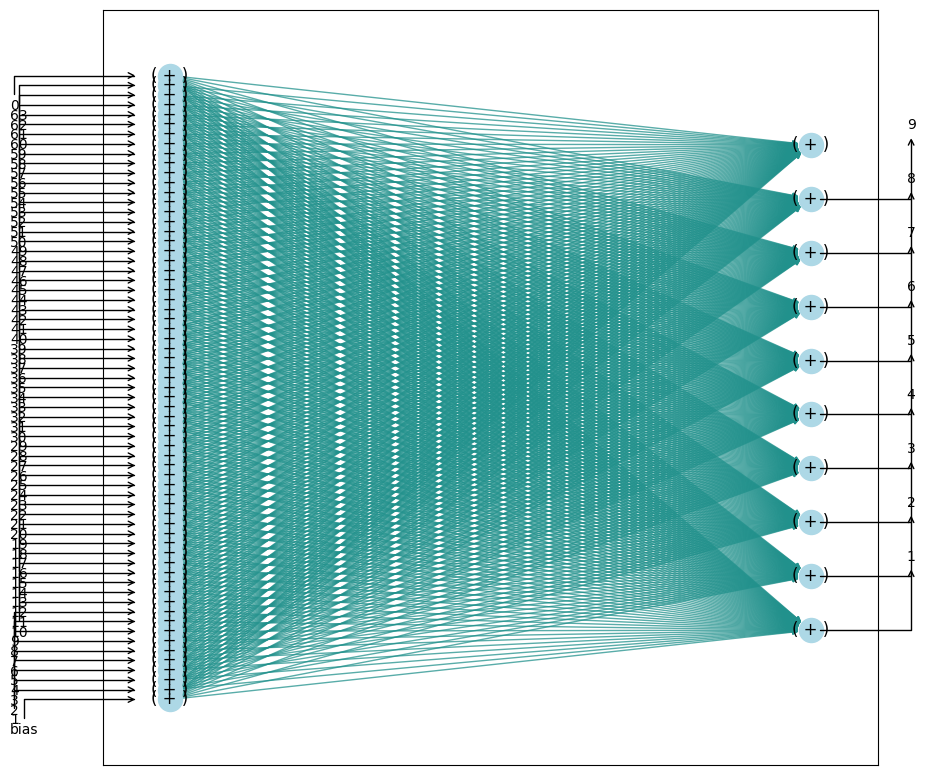

In [2]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import vis as nv
nv.viewInd('log/sept22__best.out','digits')

In [3]:
# -- View Behavior of Network
!python neat_test.py -p p/swingup.json -i demo/swingup/test_best.out --view True

	*** Running with hyperparameters:  p/swingup.json 	***
[***]	Fitness: [915.02]


In [ ]:
# -- Compare Replicates
# Run several experiments 
#  for i in {0..10}; do python neat_train.py -p p/swingup.json -n 96 -o tanh_$i; done
#  for i in {0..10}; do python neat_train.py -p p/swing_allAct.json -n 96 -o allAct_$i; done
#
# View results as median and quartiles
#
import vis as nv
experiment_1 = 'demo/swingup/tanh'
experiment_2 = 'demo/swingup/allAct'
_,_,bestRun = nv.viewReps([experiment_1,experiment_2],label=['Tanh Only','All Activation Functions'],\
                           title='Best Fitness Found with Uniform or Diverse Activations',getBest=True)